In [1]:
import pandas as pd

In [2]:
behav = pd.read_csv("summary.csv")
behav

,id,genotype,sex,exp_type,shock_color,shock_arm,treatment,replicates,ZT0,ZT,...,post_incorrect_choices,post_analysis_time,group,group_sex,folder,experiment_date,experiment_by,head_scanned,abs_dev,abs_dev_sex
0,17,dgrp100,female,operant_place,green,M,noShock,1,11:00:00,NaN,...,NaN,NaN,dgrp100_noShock,dgrp100_noShock_female,operant_place/20221222/csv/dgrp100_noShock/female,20221222,riddha,False,0.159876,0.172520
1,18,dgrp100,female,operant_place,green,R,noShock,1,11:00:00,NaN,...,NaN,NaN,dgrp100_noShock,dgrp100_noShock_female,operant_place/20221222/csv/dgrp100_noShock/female,20221222,riddha,False,0.030237,0.042881
2,19,dgrp100,female,operant_place,green,L,noShock,1,11:00:00,NaN,...,NaN,NaN,dgrp100_noShock,dgrp100_noShock_female,operant_place/20221222/csv/dgrp100_noShock/female,20221222,riddha,False,0.239896,0.227253
3,20,dgrp100,female,operant_place,green,M,noShock,1,11:00:00,NaN,...,NaN,NaN,dgrp100_noShock,dgrp100_noShock_female,operant_place/20221222/csv/dgrp100_noShock/female,20221222,riddha,False,0.025809,0.013166
4,21,dgrp100,female,operant_place,green,R,noShock,1,11:00:00,NaN,...,NaN,NaN,dgrp100_noShock,dgrp100_noShock_female,operant_place/20221222/csv/dgrp100_noShock/female,20221222,riddha,False,0.094741,0.107385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5307,44,dnc1,male,operant_color,blue,NaN,shock,2,11:00:00,18:21:41,...,27.0,600.0,dnc1_shock,dnc1_shock_male,operant_color/20230806/csv/dnc1_shock/male,20230806,riddha,False,0.099280,0.087237
5308,45,dnc1,male,operant_color,blue,NaN,shock,2,11:00:00,18:21:41,...,70.0,600.0,dnc1_shock,dnc1_shock_male,operant_color/20230806/csv/dnc1_shock/male,20230806,riddha,False,0.082689,0.070646
5309,46,dnc1,male,operant_color,blue,NaN,shock,2,11:00:00,18:21:41,...,45.0,600.0,dnc1_shock,dnc1_shock_male,operant_color/20230806/csv/dnc1_shock/male,20230806,riddha,False,0.082759,0.070715
5310,47,dnc1,male,operant_color,blue,NaN,shock,2,11:00:00,18:21:41,...,49.0,600.0,dnc1_shock,dnc1_shock_male,operant_color/20230806/csv/dnc1_shock/male,20230806,riddha,False,0.164981,0.152937


In [3]:
behav.iloc[0,-3]

False

In [32]:
brain = pd.read_csv("/Users/skumar/Documents/PhD/BrainAnalysis/Results_Vol_Entropy/GWAS_Normalized_EntropyVol.tsv", sep="\t")
brain

,DGRP,sex,Volume,Entropy0,Entropy1,Entropy2
0,DGRP_228,F,0.010634,1.742000,1.856059,1.821565
1,DGRP_228,M,0.010962,1.789805,1.835055,2.143064
2,DGRP_332,M,0.012916,1.414558,1.402126,1.227755
3,DGRP_100,M,0.014155,1.926577,1.925772,2.231003
4,DGRP_332,F,0.015221,1.505315,1.391551,1.341379
...,...,...,...,...,...,...
96,DGRP_359,F,0.028636,1.606484,1.620327,1.595721
97,DGRP_091,F,0.029890,1.716160,1.765672,1.744629
98,DGRP_176,F,0.031885,1.664873,1.721217,1.698591
99,DGRP_790,M,0.031894,1.638082,1.632863,1.792953


In [33]:
def split_string_with_dgrp(df):
    DGRP=[]
    sex = []
    for i in range(len(df)):
        if 'dgrp' in df.iloc[i, 1] and df.iloc[i, -3]==True:
            #print(df.iloc[i, 1])
            #DGRP.append(df.iloc[i, 1].split('dgrp')[1])
            DGRP.append(df.iloc[i, 1])
            s= df.iloc[i,2]
            #if s == "male" : s="M"
            #else: s="F"
            sex.append(s)
    return DGRP,sex
DGRP,sex = split_string_with_dgrp(behav)

In [34]:
data = behav[behav['genotype'].isin(DGRP) & behav['sex'].isin(sex) & behav["head_scanned"]==True]

In [35]:
data

,id,genotype,sex,exp_type,shock_color,shock_arm,treatment,replicates,ZT0,ZT,...,post_incorrect_choices,post_analysis_time,group,group_sex,folder,experiment_date,experiment_by,head_scanned,abs_dev,abs_dev_sex
2528,1,dgrp153,female,operant_place,green,L,shock,1,16:00:00,17:42:50,...,NaN,NaN,dgrp153_shock,dgrp153_shock_female,operant_place/20230414/csv/dgrp153_shock/female,20230414,riddha,True,0.168387,0.130132
2544,9,dgrp153,male,operant_place,green,R,shock,1,16:00:00,17:42:50,...,NaN,NaN,dgrp153_shock,dgrp153_shock_male,operant_place/20230414/csv/dgrp153_shock/male,20230414,riddha,True,0.047087,0.008831
2592,1,dgrp313,female,operant_place,green,L,shock,1,11:00:00,13:00:22,...,NaN,NaN,dgrp313_shock,dgrp313_shock_female,operant_place/20230414/csv/dgrp313_shock/female,20230414,riddha,True,0.235604,0.245171
2608,9,dgrp313,male,operant_place,green,R,shock,1,11:00:00,13:00:22,...,NaN,NaN,dgrp313_shock,dgrp313_shock_male,operant_place/20230414/csv/dgrp313_shock/male,20230414,riddha,True,0.103920,0.113488
2656,1,dgrp721,female,operant_place,green,L,shock,1,11:00:00,14:09:47,...,NaN,NaN,dgrp721_shock,dgrp721_shock_female,operant_place/20230414/csv/dgrp721_shock/female,20230414,riddha,True,0.236740,0.205605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,42,dgrp818,male,operant_place,green,R,shock,2,16:00:00,17:28:50,...,NaN,NaN,dgrp818_shock,dgrp818_shock_male,operant_place/20230710/csv/dgrp818_shock/male,20230710,riddha,True,0.088770,0.061299
5097,34,dgrp853,female,operant_place,green,L,shock,2,16:00:00,18:33:26,...,NaN,NaN,dgrp853_shock,dgrp853_shock_female,operant_place/20230710/csv/dgrp853_shock/female,20230710,riddha,True,0.221883,0.235297
5113,42,dgrp853,male,operant_place,green,R,shock,2,16:00:00,18:33:26,...,NaN,NaN,dgrp853_shock,dgrp853_shock_male,operant_place/20230710/csv/dgrp853_shock/male,20230710,riddha,True,0.173586,0.160172
5161,34,dgrp913,female,operant_place,green,L,shock,2,11:00:00,13:16:11,...,NaN,NaN,dgrp913_shock,dgrp913_shock_female,operant_place/20230710/csv/dgrp913_shock/female,20230710,riddha,True,0.184951,0.162527


In [36]:
data['genotype'] = "DGRP_"+data['genotype'].str.split('dgrp').str.get(1)

/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_45881/255209310.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
data.rename(columns={'genotype': 'DGRP'}, inplace=True)

/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_45881/3106402434.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
data["sex"] = data["sex"].replace(["male", "female"], ["M", "F"])

/var/folders/jc/23tmvmc554b_hqpgl1mn9wch0000gq/T/ipykernel_45881/264158564.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
data

,id,DGRP,sex,exp_type,shock_color,shock_arm,treatment,replicates,ZT0,ZT,...,post_incorrect_choices,post_analysis_time,group,group_sex,folder,experiment_date,experiment_by,head_scanned,abs_dev,abs_dev_sex
2528,1,DGRP_153,F,operant_place,green,L,shock,1,16:00:00,17:42:50,...,NaN,NaN,dgrp153_shock,dgrp153_shock_female,operant_place/20230414/csv/dgrp153_shock/female,20230414,riddha,True,0.168387,0.130132
2544,9,DGRP_153,M,operant_place,green,R,shock,1,16:00:00,17:42:50,...,NaN,NaN,dgrp153_shock,dgrp153_shock_male,operant_place/20230414/csv/dgrp153_shock/male,20230414,riddha,True,0.047087,0.008831
2592,1,DGRP_313,F,operant_place,green,L,shock,1,11:00:00,13:00:22,...,NaN,NaN,dgrp313_shock,dgrp313_shock_female,operant_place/20230414/csv/dgrp313_shock/female,20230414,riddha,True,0.235604,0.245171
2608,9,DGRP_313,M,operant_place,green,R,shock,1,11:00:00,13:00:22,...,NaN,NaN,dgrp313_shock,dgrp313_shock_male,operant_place/20230414/csv/dgrp313_shock/male,20230414,riddha,True,0.103920,0.113488
2656,1,DGRP_721,F,operant_place,green,L,shock,1,11:00:00,14:09:47,...,NaN,NaN,dgrp721_shock,dgrp721_shock_female,operant_place/20230414/csv/dgrp721_shock/female,20230414,riddha,True,0.236740,0.205605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,42,DGRP_818,M,operant_place,green,R,shock,2,16:00:00,17:28:50,...,NaN,NaN,dgrp818_shock,dgrp818_shock_male,operant_place/20230710/csv/dgrp818_shock/male,20230710,riddha,True,0.088770,0.061299
5097,34,DGRP_853,F,operant_place,green,L,shock,2,16:00:00,18:33:26,...,NaN,NaN,dgrp853_shock,dgrp853_shock_female,operant_place/20230710/csv/dgrp853_shock/female,20230710,riddha,True,0.221883,0.235297
5113,42,DGRP_853,M,operant_place,green,R,shock,2,16:00:00,18:33:26,...,NaN,NaN,dgrp853_shock,dgrp853_shock_male,operant_place/20230710/csv/dgrp853_shock/male,20230710,riddha,True,0.173586,0.160172
5161,34,DGRP_913,F,operant_place,green,L,shock,2,11:00:00,13:16:11,...,NaN,NaN,dgrp913_shock,dgrp913_shock_female,operant_place/20230710/csv/dgrp913_shock/female,20230710,riddha,True,0.184951,0.162527


In [40]:
merged_df = pd.merge(brain, data, on=['DGRP', 'sex'])

In [41]:
merged_df

,DGRP,sex,Volume,Entropy0,Entropy1,Entropy2,id,exp_type,shock_color,shock_arm,...,post_incorrect_choices,post_analysis_time,group,group_sex,folder,experiment_date,experiment_by,head_scanned,abs_dev,abs_dev_sex
0,DGRP_732,F,0.015346,1.588548,1.597554,1.260962,40,operant_place,blue,L,...,NaN,NaN,dgrp732_shock,dgrp732_shock_female,operant_place/20230621/csv/dgrp732_shock/female,20230621,riddha,True,0.164331,0.167038
1,DGRP_737,F,0.015415,1.872372,1.885794,2.107636,2,operant_place,blue,M,...,NaN,NaN,dgrp737_shock,dgrp737_shock_female,operant_place/20230707/csv/dgrp737_shock/female,20230707,riddha,True,0.207584,0.196769
2,DGRP_732,M,0.016771,1.783274,1.885432,1.737984,48,operant_place,blue,R,...,NaN,NaN,dgrp732_shock,dgrp732_shock_male,operant_place/20230621/csv/dgrp732_shock/male,20230621,riddha,True,0.140436,0.137686
3,DGRP_309,F,0.017028,1.472865,1.705017,1.962350,1,operant_place,blue,L,...,NaN,NaN,dgrp309_shock,dgrp309_shock_female,operant_place/20230703/csv/dgrp309_shock/female,20230703,riddha,True,0.053567,0.057445
4,DGRP_437,M,0.017706,1.640324,1.689384,1.834623,10,operant_place,blue,L,...,NaN,NaN,dgrp437_shock,dgrp437_shock_male,operant_place/20230705/csv/dgrp437_shock/male,20230705,riddha,True,0.042431,0.040824
5,DGRP_309,M,0.017826,1.736349,1.755159,1.873762,9,operant_place,blue,R,...,NaN,NaN,dgrp309_shock,dgrp309_shock_male,operant_place/20230703/csv/dgrp309_shock/male,20230703,riddha,True,0.110822,0.106943
6,DGRP_354,F,0.018734,1.496644,1.578005,1.880820,40,operant_place,green,L,...,NaN,NaN,dgrp354_shock,dgrp354_shock_female,operant_place/20230621/csv/dgrp354_shock/female,20230621,riddha,True,0.017099,0.002430
7,DGRP_786,F,0.018789,1.650172,1.683090,1.689623,2,operant_place,blue,M,...,NaN,NaN,dgrp786_shock,dgrp786_shock_female,operant_place/20230705/csv/dgrp786_shock/female,20230705,riddha,True,0.148576,0.154391
8,DGRP_737,M,0.018805,1.808627,1.864490,2.106834,10,operant_place,blue,L,...,NaN,NaN,dgrp737_shock,dgrp737_shock_male,operant_place/20230707/csv/dgrp737_shock/male,20230707,riddha,True,0.080066,0.069080
9,DGRP_354,M,0.019798,1.465704,1.632769,1.955570,48,operant_place,green,R,...,NaN,NaN,dgrp354_shock,dgrp354_shock_male,operant_place/20230621/csv/dgrp354_shock/male,20230621,riddha,True,0.094630,0.113490


In [42]:
import plotly.express as px

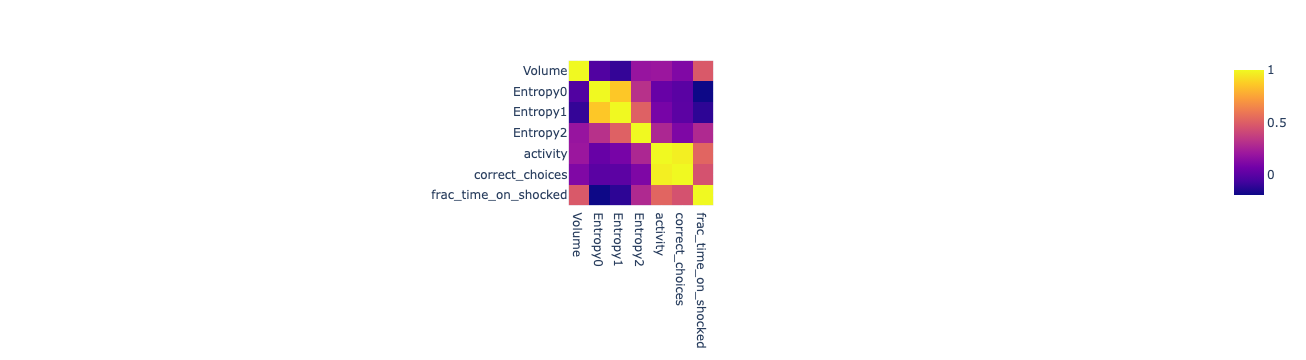

In [44]:
# Calculer la matrice de corrélation
correlation_matrix = merged_df[["Volume","Entropy0","Entropy1","Entropy2","activity","correct_choices","frac_time_on_shocked"]].corr()

# Créer un heatmap interactif avec Plotly
fig = px.imshow(correlation_matrix)
fig.show()

In [45]:
correlation_matrix

,Volume,Entropy0,Entropy1,Entropy2,activity,correct_choices,frac_time_on_shocked
Volume,1.000000,-0.026109,-0.102362,0.188984,0.201177,0.114964,0.478786
Entropy0,-0.026109,1.000000,0.859363,0.312873,0.040258,-0.000842,-0.193094
Entropy1,-0.102362,0.859363,1.000000,0.510497,0.088940,0.005572,-0.117834
Entropy2,0.188984,0.312873,0.510497,1.000000,0.269285,0.108738,0.279798
activity,0.201177,0.040258,0.088940,0.269285,1.000000,0.971724,0.523807
correct_choices,0.114964,-0.000842,0.005572,0.108738,0.971724,1.000000,0.447671
frac_time_on_shocked,0.478786,-0.193094,-0.117834,0.279798,0.523807,0.447671,1.000000


In [5]:
data = merged_df[["Volume","Entropy0","Entropy1","Entropy2","activity","correct_choices","frac_time_on_shocked"]]
#data.to_csv("/Users/skumar/Documents/PhD/BrainAnalysis/Behavior/data.csv", index=False)

NameError: name 'merged_df' is not defined

In [4]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.5, figsize=(10, 6), diagonal='kde');

NameError: name 'data' is not defined

In [25]:
import pymc as pm
import pandas as pd
import numpy as np

# Step 1: Load and preprocess the data
data = merged_df[["Volume","activity","correct_choices","frac_time_on_shocked"]]# Replace 'your_data.csv' with your actual data file
# Assuming the columns are 'frac_time_on_shocked', 'Volume', 'activity', and 'correct_choices'
frac_time = data['frac_time_on_shocked']
volume = data['Volume']
activity = data['activity']
correct_choices = data['correct_choices']

# Step 2: Define the prior distributions
with pm.Model() as model:
    # Priors for the parameters
    intercept = pm.Normal('intercept', mu=0, sd=10)
    coef_volume = pm.Normal('coef_volume', mu=0, sd=10)
    coef_activity = pm.Normal('coef_activity', mu=0, sd=10)
    coef_correct_choices = pm.Normal('coef_correct_choices', mu=0, sd=10)
    
    # Step 3: Define the linear regression model
    mu = intercept + coef_volume * volume + coef_activity * activity + coef_correct_choices * correct_choices
    sigma = pm.Exponential('sigma', lam=1)  # Prior for the error term
    
    # Step 4: Define the likelihood
    likelihood = pm.Normal('likelihood', mu=mu, sd=sigma, observed=frac_time)
    
    # Step 5: Perform the sampling
    trace = pm.sample(2000, tune=1000)  # Use more samples and tune for better results

# Step 6: Examine the results
pm.summary(trace)  # Summary statistics of the posterior distributions
pm.traceplot(trace)  # Plot the posterior distributions


ModuleNotFoundError: No module named 'pymc'